In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
!pip install pennylane --upgrade

In [ ]:
import json
from Filters import Filters
from Filters import *
from Data_load import data_load

from Model import Model
import keras

from utils import *

import time

## Import the images
data = data_load()
train_images, train_labels, test_images, test_labels = data.data_mnist()

types ={
    #0: "geometrical",
    #1: "classical_w_pooling",
    #2: "quantum_random",
    3: "quantum_cnot",
    #4: "classical_wo_pooling"
}

6000


In [ ]:
train_images[0].shape

(28, 28, 1)

In [ ]:
len(test_images)

1000

In [ ]:
def trainTestData(train_images, train_labels, test_images, test_labels, label1, label2, n_train, n_test):
    n_train_images, n_train_labels, n_test_images, n_test_labels = [], [], [], []
    i = 0
    while (n_train > 0 and i < len(train_images)):
        if train_labels[i] == label1:
            n_train_images.append(train_images[i])
            n_train_labels.append(label1)
            n_train -= 1
        if train_labels[i] == label2:
            n_train_images.append(train_images[i])
            n_train_labels.append(label2)
            n_train -= 1
        i = i+1
    i = 0
    while(n_test>0 and i < len(test_images)):
        if test_labels[i] == label1:
            n_test_images.append(test_images[i])
            n_test_labels.append(label1)
            n_test -= 1
        if test_labels[i] == label2:
            n_test_images.append(test_images[i])
            n_test_labels.append(label2)
            n_test -= 1
        i = i+1
    return n_train_images, n_train_labels, n_test_images, n_test_labels

In [ ]:
def imageShape(train_images, test_images):
    new_train_images = []
    new_test_images = []
    for img in train_images:
        new_train_images.append(img.reshape(img.shape[0], img.shape[0], 1))
    for img in test_images:
        new_test_images.append(img.reshape(img.shape[0], img.shape[0], 1))
    return new_train_images, new_test_images

In [ ]:
train_images, train_labels, test_images, test_labels = trainTestData(train_images, train_labels, test_images, test_labels, 3, 5, 75, 35)

In [ ]:
test_images[0].shape

(28, 28, 1)

In [ ]:
for t, type in types.items():
    start_time = time.time()
    filtered_train_images = apply_filter(train_images, t, data.n_channels, data.n_layers)
    filtered_test_images = apply_filter(test_images, t, data.n_channels, data.n_layers)
    end_time = time.time()
    # Save pre-processed images
    #np.save(data.SAVE_PATH + "filtered_train_images_{}.npy".format(type), filtered_train_images)
    #np.save(data.SAVE_PATH + "filtered_test_images_{}.npy".format(type), filtered_test_images)

    # Calculate the time taken
    time_taken = end_time - start_time
    # Save time taken to a text file
    #with open(data.SAVE_PATH + "time_for_{}.txt".format(type), "w") as file:
    #   file.write("Time taken for filtering data: {} seconds".format(time_taken))

fitlered pre-processing of images, with type = 3
fitlered pre-processing of images, with type = 3


In [ ]:
for i in range(len(train_images)):
    train_images[i] = filtered_train_images[i][:, :, 3]
for i in range(len(test_images)):
    test_images[i] = filtered_test_images[i][:, :, 3]
train_images, test_images = imageShape(train_images, test_images)
print(train_images[0].shape)
print(test_images[0].shape)

(14, 14, 1)
(14, 14, 1)


In [ ]:
test_images[2]

tensor([[[ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ]],

        [[ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ]],

        [[ 1.        ],
         [ 1.        ],
         [ 0.98909161],
         [-0.98879137],
         [ 0.2258827 ],
         [-0.35162321],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1.        ],
         [ 1

In [ ]:
for t, type in types.items():
    start_time = time.time()
    filtered_train_images = apply_filter(train_images, t, int(data.n_channels), int(data.n_layers))
    filtered_test_images = apply_filter(test_images, t, int(data.n_channels), int(data.n_layers))
    end_time = time.time()
        # Save pre-processed images
        #np.save(data.SAVE_PATH + "filtered_train_images_{}.npy".format(type), filtered_train_images)
        #np.save(data.SAVE_PATH + "filtered_test_images_{}.npy".format(type), filtered_test_images)

        # Calculate the time taken
    time_taken = end_time - start_time
        # Save time taken to a text file
        #with open(data.SAVE_PATH + "time_for_{}.txt".format(type), "w") as file:
         #   file.write("Time taken for filtering data: {} seconds".format(time_taken))

fitlered pre-processing of images, with type = 3
fitlered pre-processing of images, with type = 3


In [ ]:
for i in range(len(train_images)):
    train_images[i] = filtered_train_images[i][:, :, 3]
for i in range(len(test_images)):
    test_images[i] = filtered_test_images[i][:, :, 3]
print(train_images[0].shape)
print(test_images[0].shape)

(7, 7)
(7, 7)


In [ ]:
test_images[5]

tensor([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  0.99958518,  0.22598882,  0.94336579,  1.        ,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  0.21152023, -0.0654622 , -0.75846166,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  0.82505371,  0.53058809,  0.51345047,
          1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        , -0.06692354,
          0.95415937,  1.        ],
        [ 1.        ,  1.        ,  0.99999273,  0.64217374,  0.97955613,
          0.73574234,  1.        ],
        [ 1.        ,  1.        ,  0.99814996,  0.99999955, -0.84819258,
          1.        ,  1.        ]], requires_grad=True)

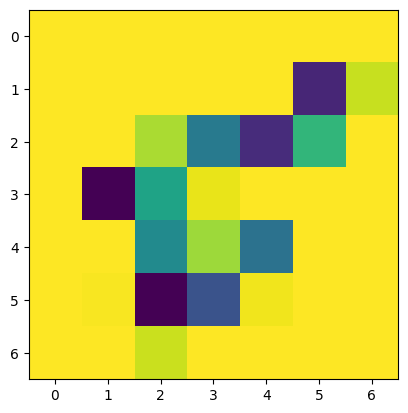

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[9])

In [ ]:
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
for img in train_images:
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] < 0:
                img[i][j] = 0
            else:
                img[i][j] = 1
for img in test_images:
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] < 0:
                img[i][j] = 0
            else:
                img[i][j] = 1

In [ ]:
new_train_images, new_test_images = [], []

for img in train_images:
    img = np.reshape(img, [1, 7, 7, 1])
    max_pool_2d = keras.layers.MaxPooling2D(pool_size=(1, 1), strides=(2, 2), padding="valid")
    new_train_images.append(np.reshape(max_pool_2d(img), [4, 4]))
train_images = new_train_images[:]

for img in test_images:
    img = np.reshape(img, [1, 7, 7, 1])
    max_pool_2d = keras.layers.MaxPooling2D(pool_size=(1, 1), strides=(2, 2), padding="valid")
    new_test_images.append(np.reshape(max_pool_2d(img), [4, 4]))
test_images = new_test_images[:]

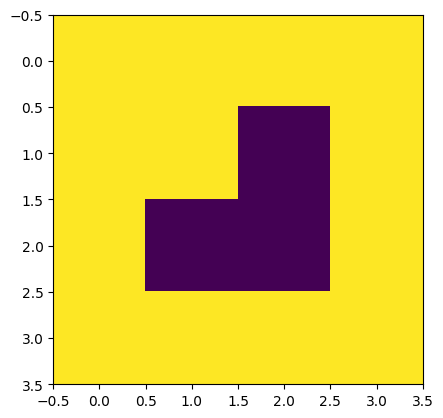

In [ ]:
plt.imshow(test_images[9])

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
def block(weights, wires):
    qml.RY(weights[0], wires=wires[0])
    qml.RY(weights[1], wires=wires[1])
    qml.CNOT(wires=wires)

In [ ]:
BAS = []
for img in train_images:
    BAS.append(img.flatten())

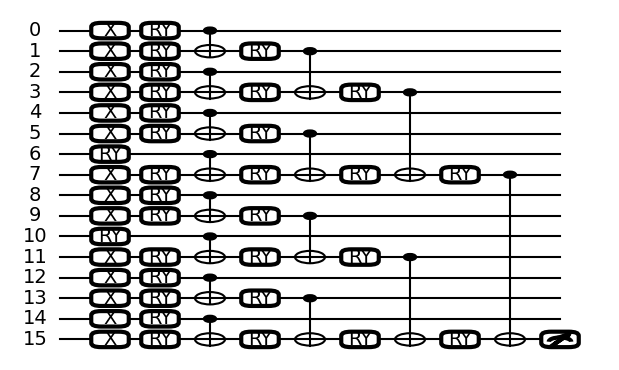

In [ ]:
dev = qml.device("default.qubit", wires=16)


@qml.qnode(dev)
def circuit(image, template_weights):
    qml.BasisStatePreparation(image, wires=range(16))
    qml.TTN(
        wires=range(16),
        n_block_wires=2,
        block=block,
        n_params_block=2,
        template_weights=template_weights,
    )
    return qml.expval(qml.PauliZ(wires=15))

weights = np.random.random(size=[15, 2])
fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(BAS[0], weights)
fig.set_size_inches((6, 3.5))

In [ ]:
new_train_images_3 = []
new_train_images_5 = []

new_train_labels_3 = []
new_train_labels_5 = []

for i in range(len(BAS)):
  if train_labels[i] == 3:
    new_train_images_3.append(BAS[i])
    new_train_labels_3.append(3)
  else:
    new_train_images_5.append(BAS[i])
    new_train_labels_5.append(5)
train_images = new_train_images_3[0:30] + new_train_images_5[0:30]
train_labels = new_train_labels_3[0:30] + new_train_labels_5[0:30]

In [ ]:
len(train_labels)

60

In [ ]:
train_labels[25:60]

[3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5]

In [ ]:
BAS = train_images[:]

In [ ]:
label1 = 3
label2 = 5
def costfunc(params):
    cost = 0
    for i in range(len(BAS)):
        if i < len(BAS) / 2:
            cost += circuit(BAS[i], params)
        else:
            cost -= circuit(BAS[i], params)
    return cost

In [ ]:
params = np.random.random(size=[15, 2], requires_grad=True)
optimizer = qml.GradientDescentOptimizer(stepsize=0.01)

for k in range(71):
    if k % 5 == 0:
        print(f"Step {k}, cost: {costfunc(params)}")
    params = optimizer.step(costfunc, params)

Step 0, cost: -0.3400479179786669
Step 5, cost: -6.566007611538703
Step 10, cost: -14.055048164344095
Step 15, cost: -18.480603138347025
Step 20, cost: -20.42182097613821
Step 25, cost: -21.202946580554954
Step 30, cost: -21.535244853213253
Step 35, cost: -21.694739772645747
Step 40, cost: -21.782015740948264
Step 45, cost: -21.835596120293353
Step 50, cost: -21.871602067433493
Step 55, cost: -21.897449784203047
Step 60, cost: -21.916879128947105
Step 65, cost: -21.93194939393253
Step 70, cost: -21.94389153268588


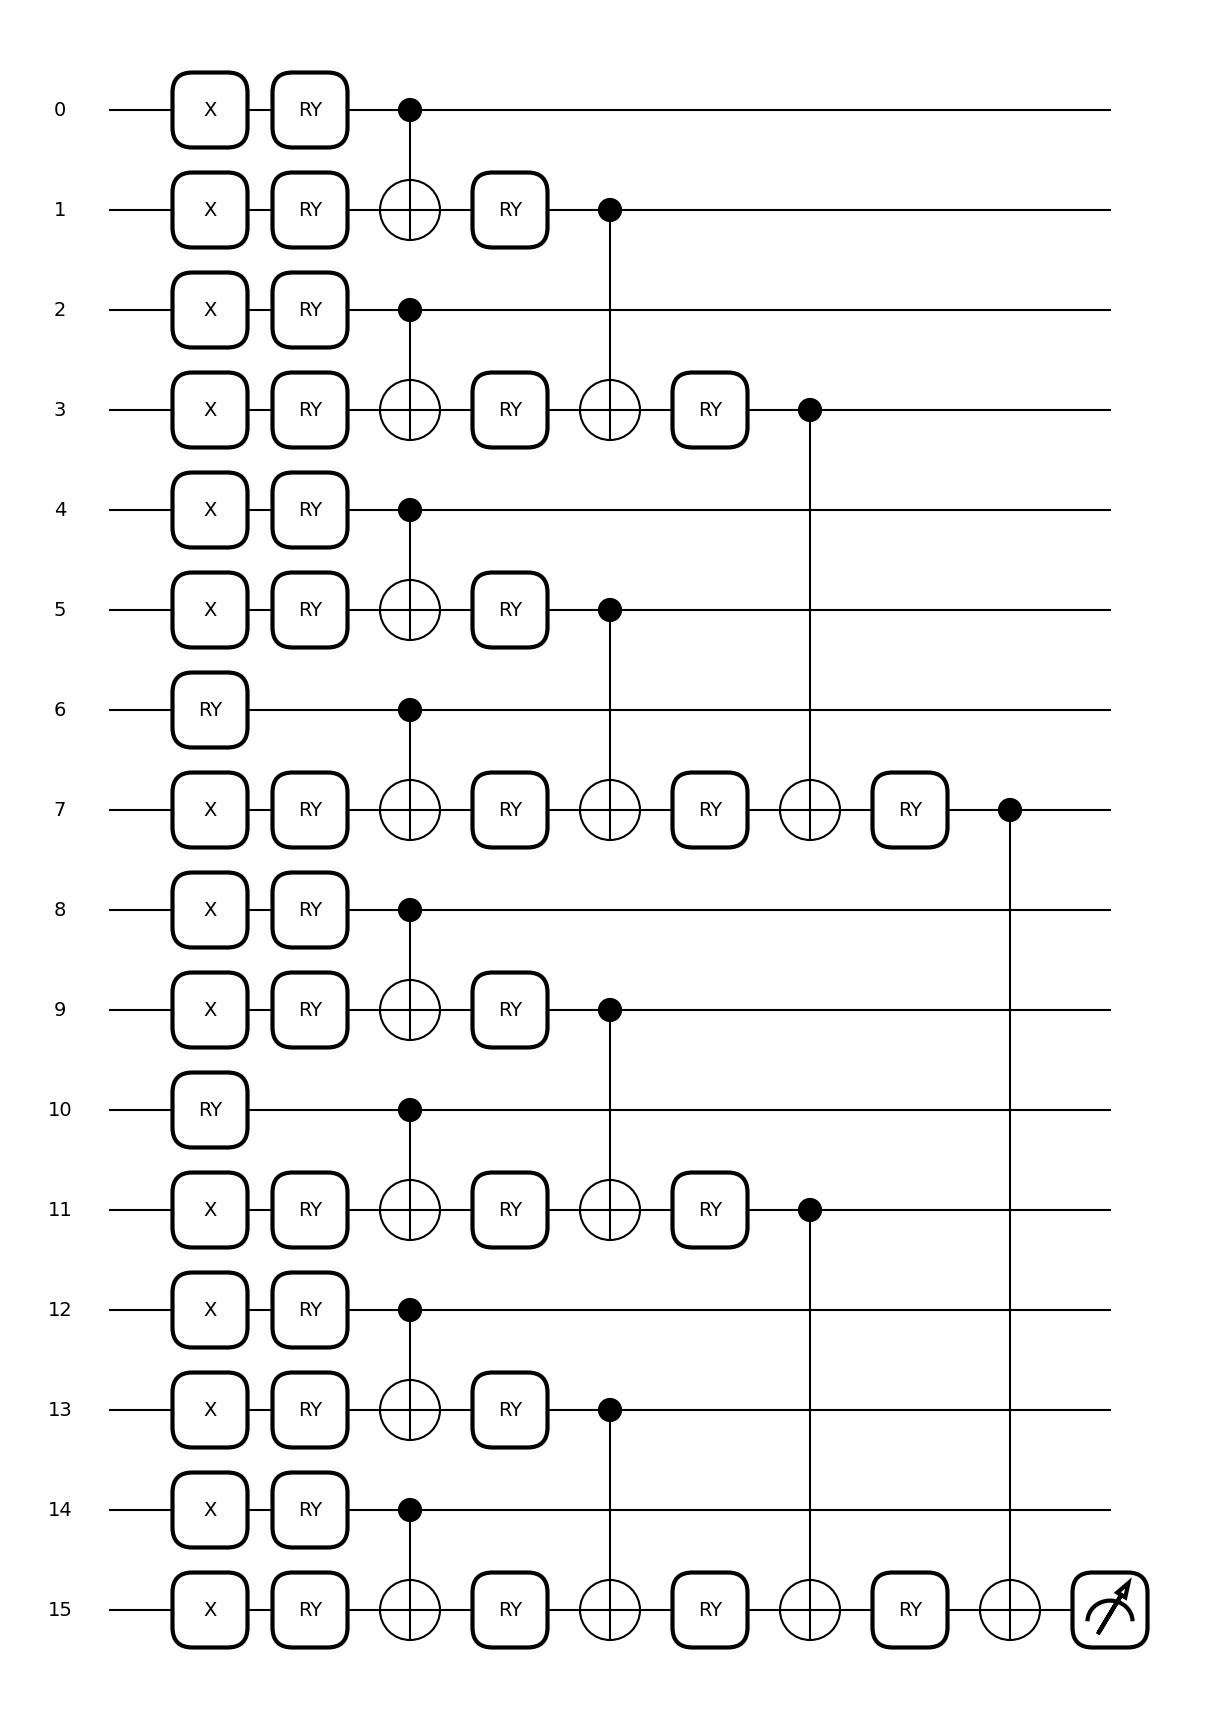

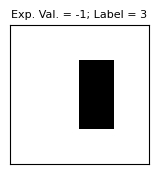

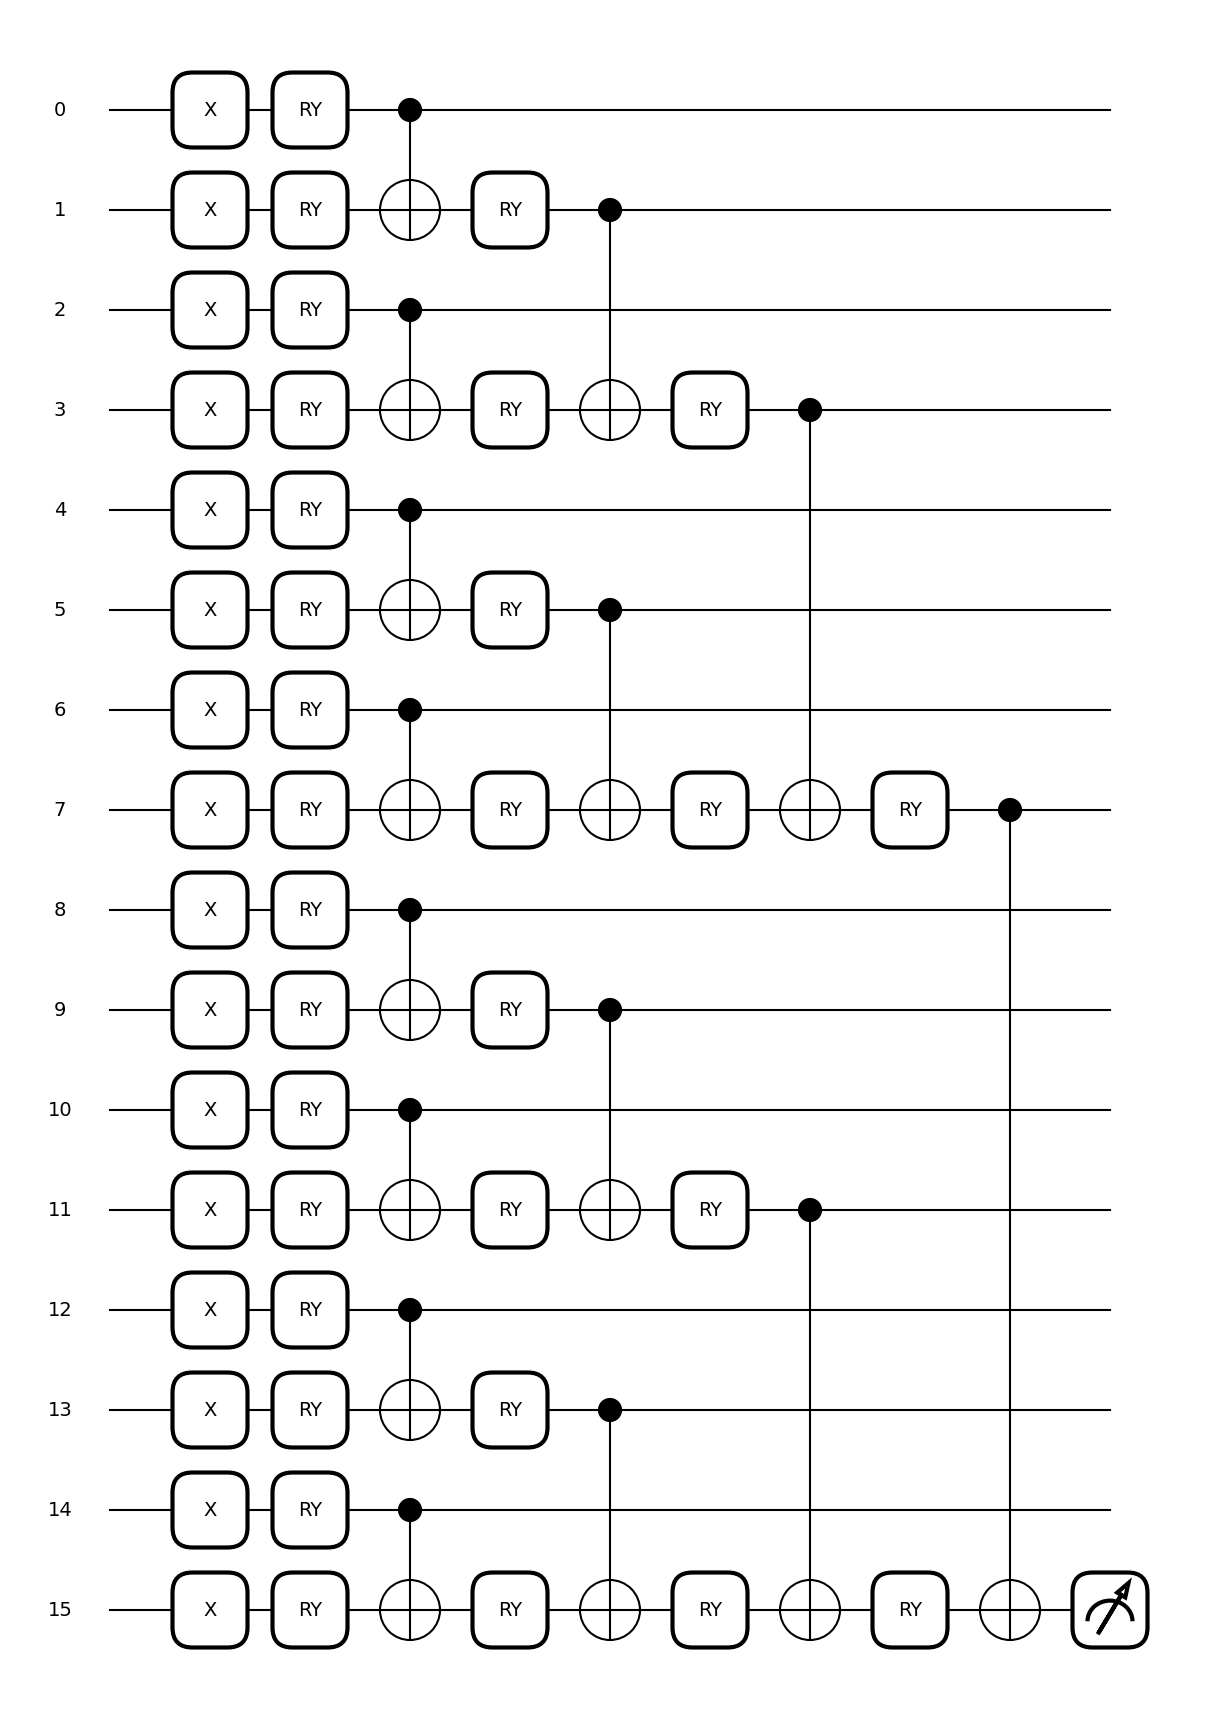

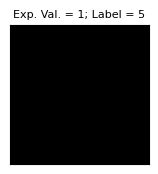

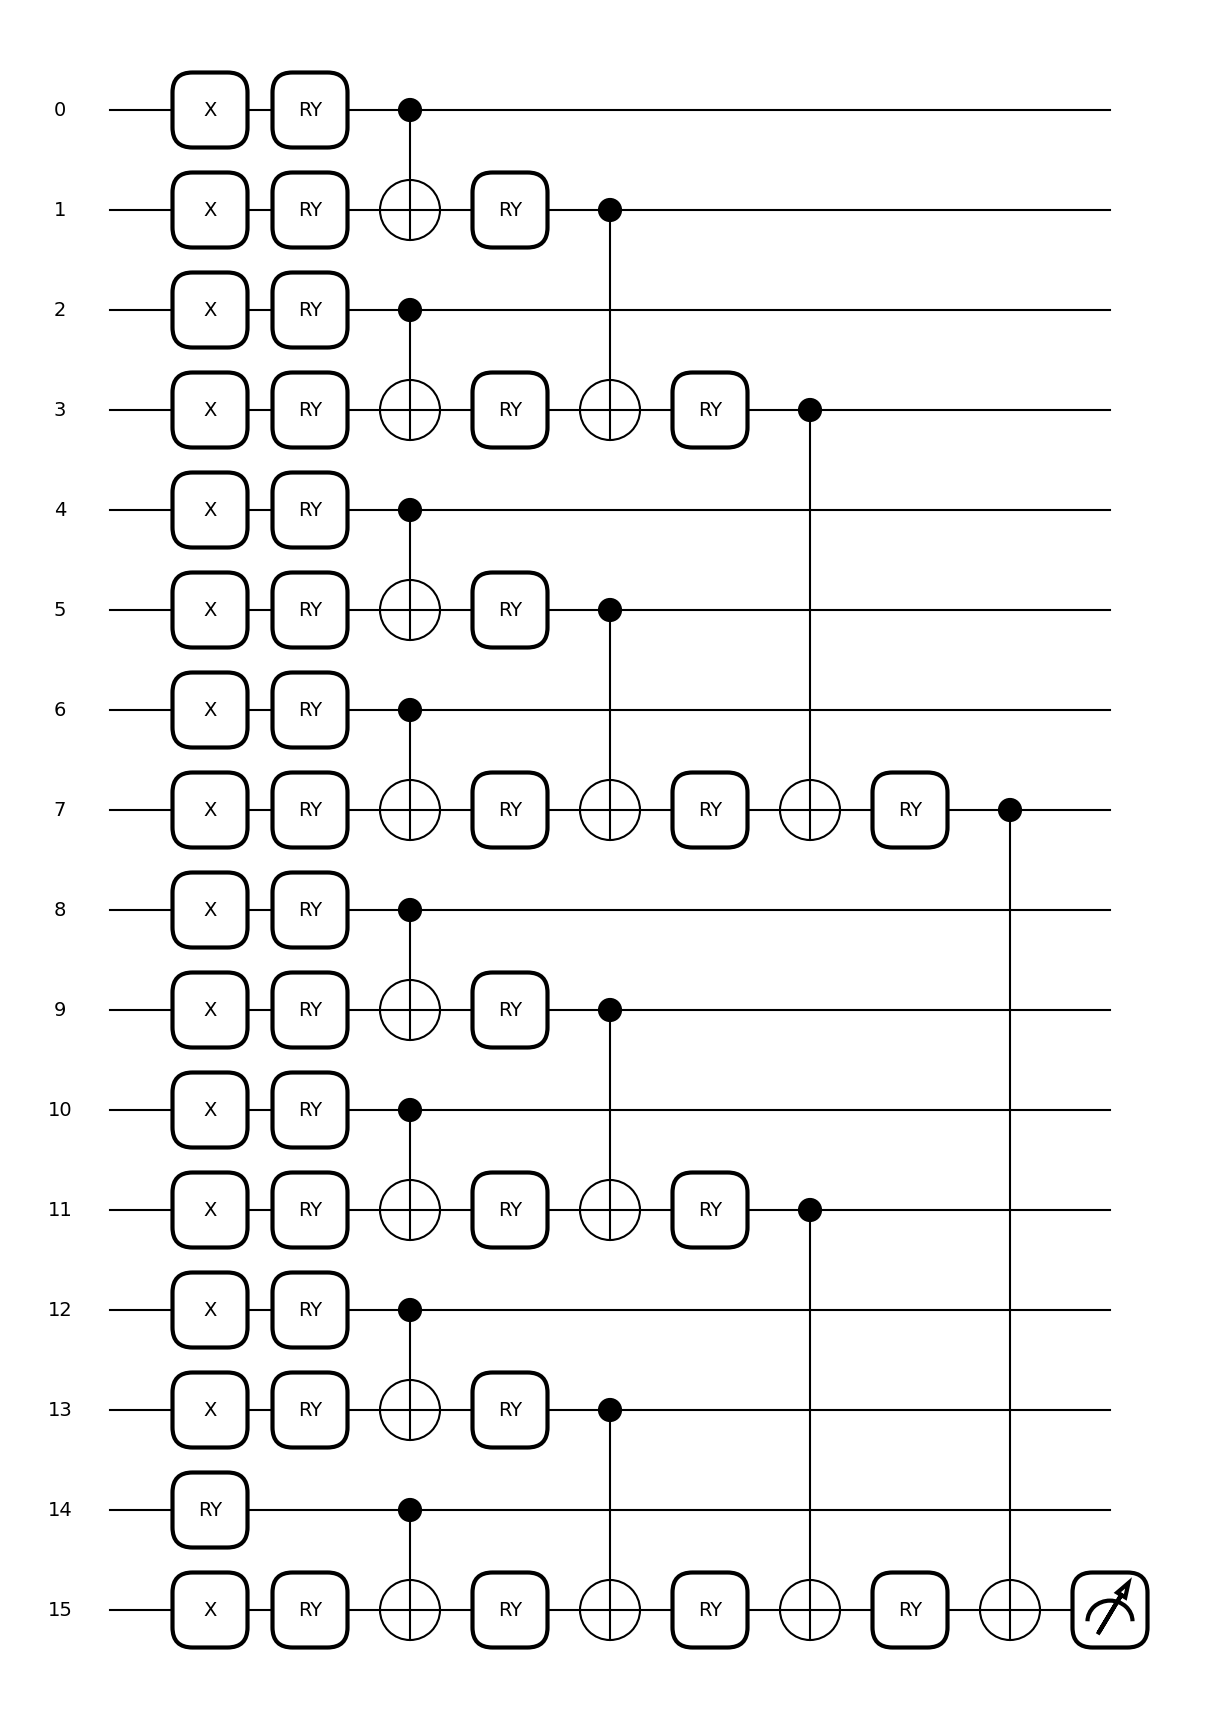

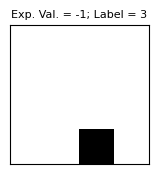

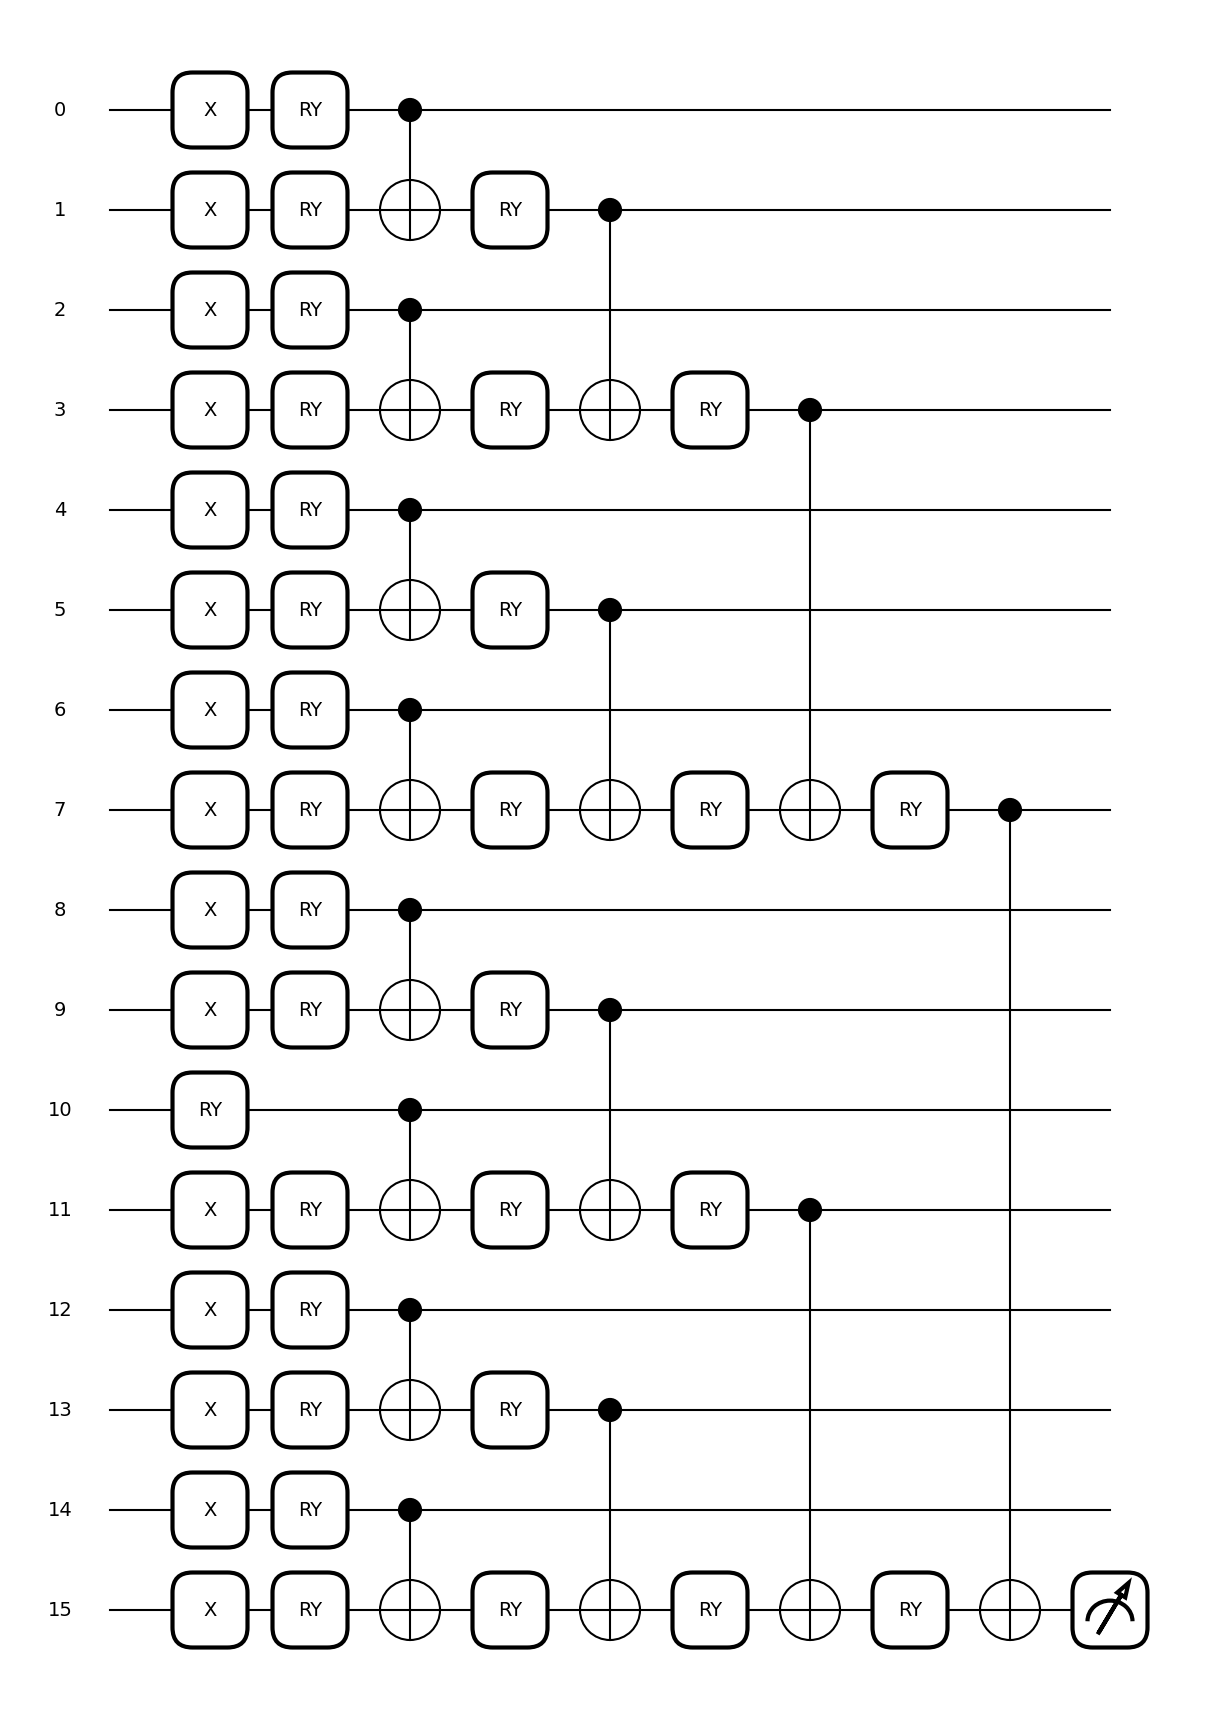

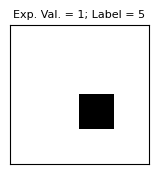

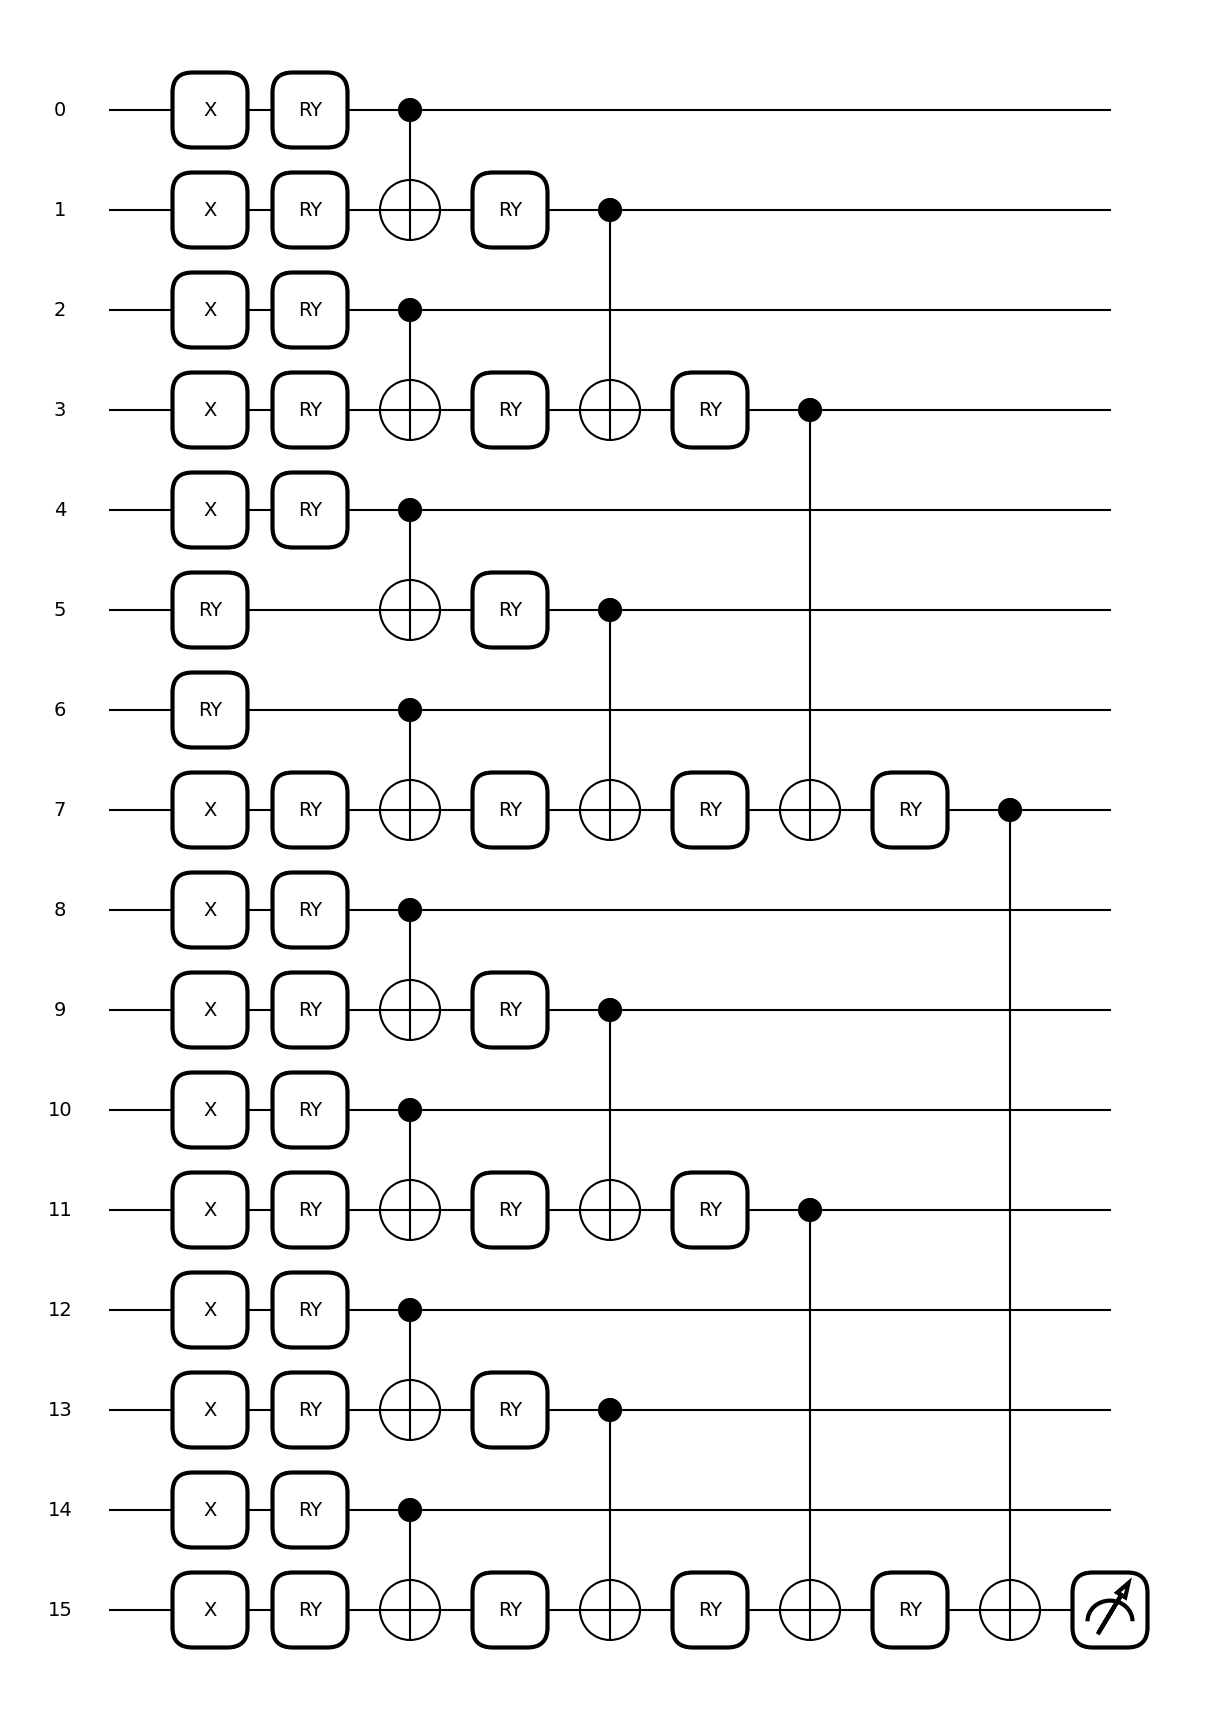

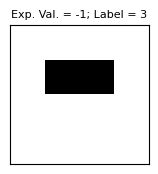

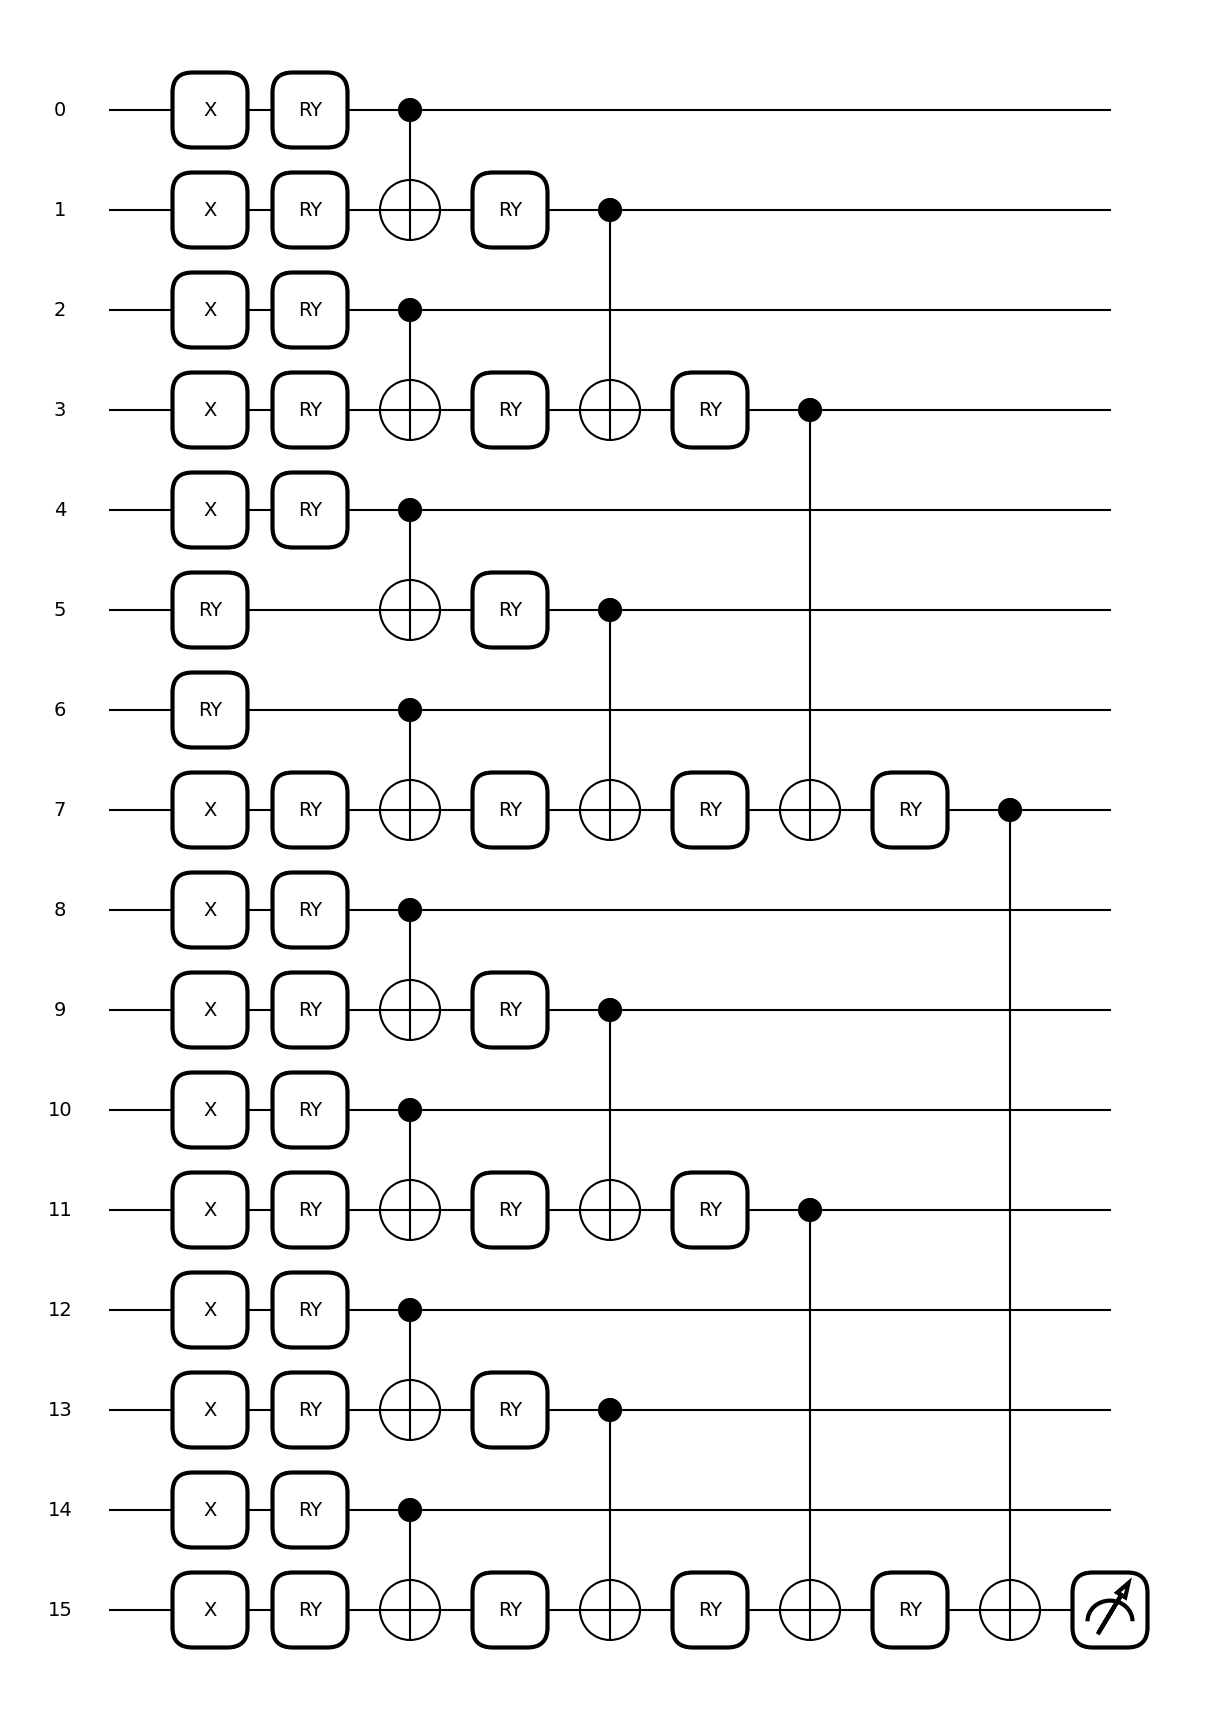

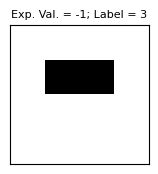

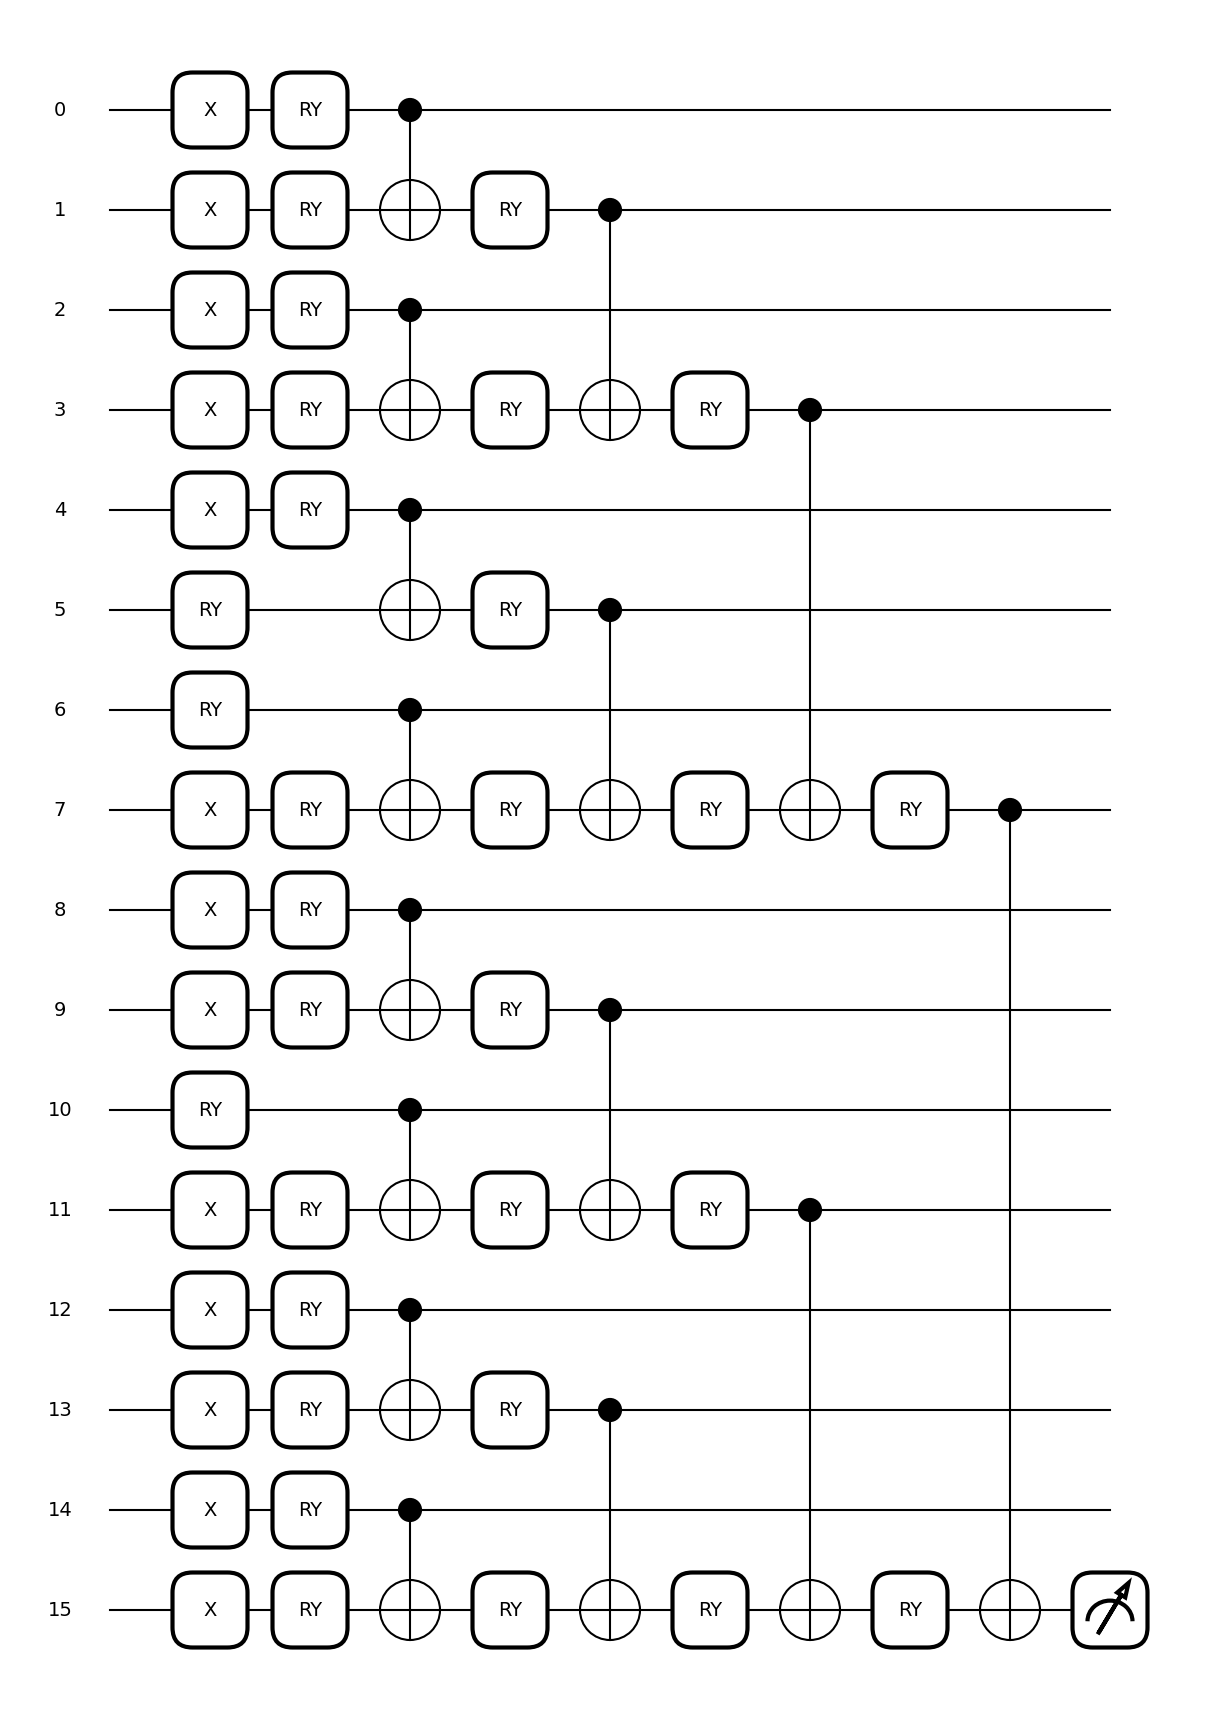

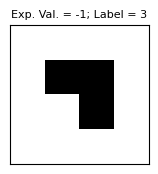

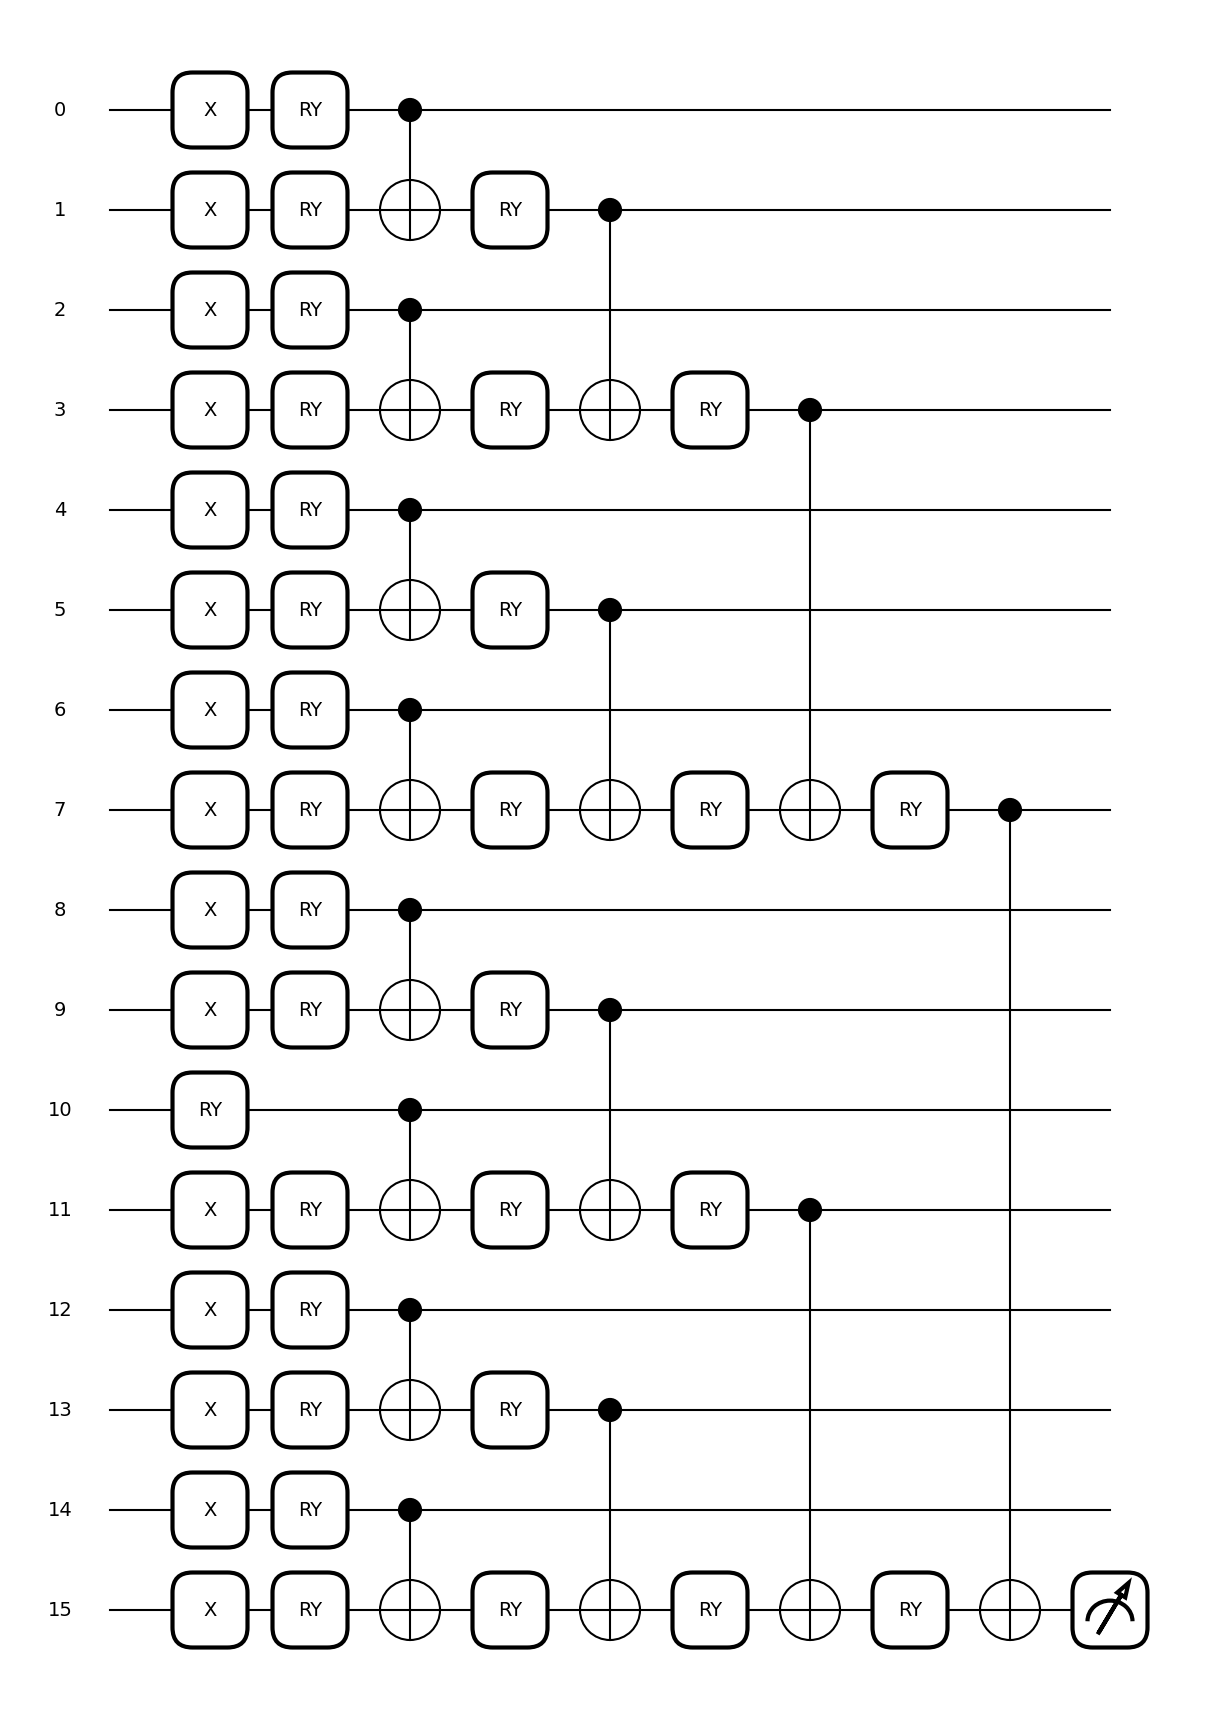

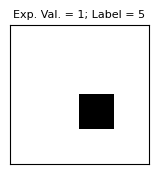

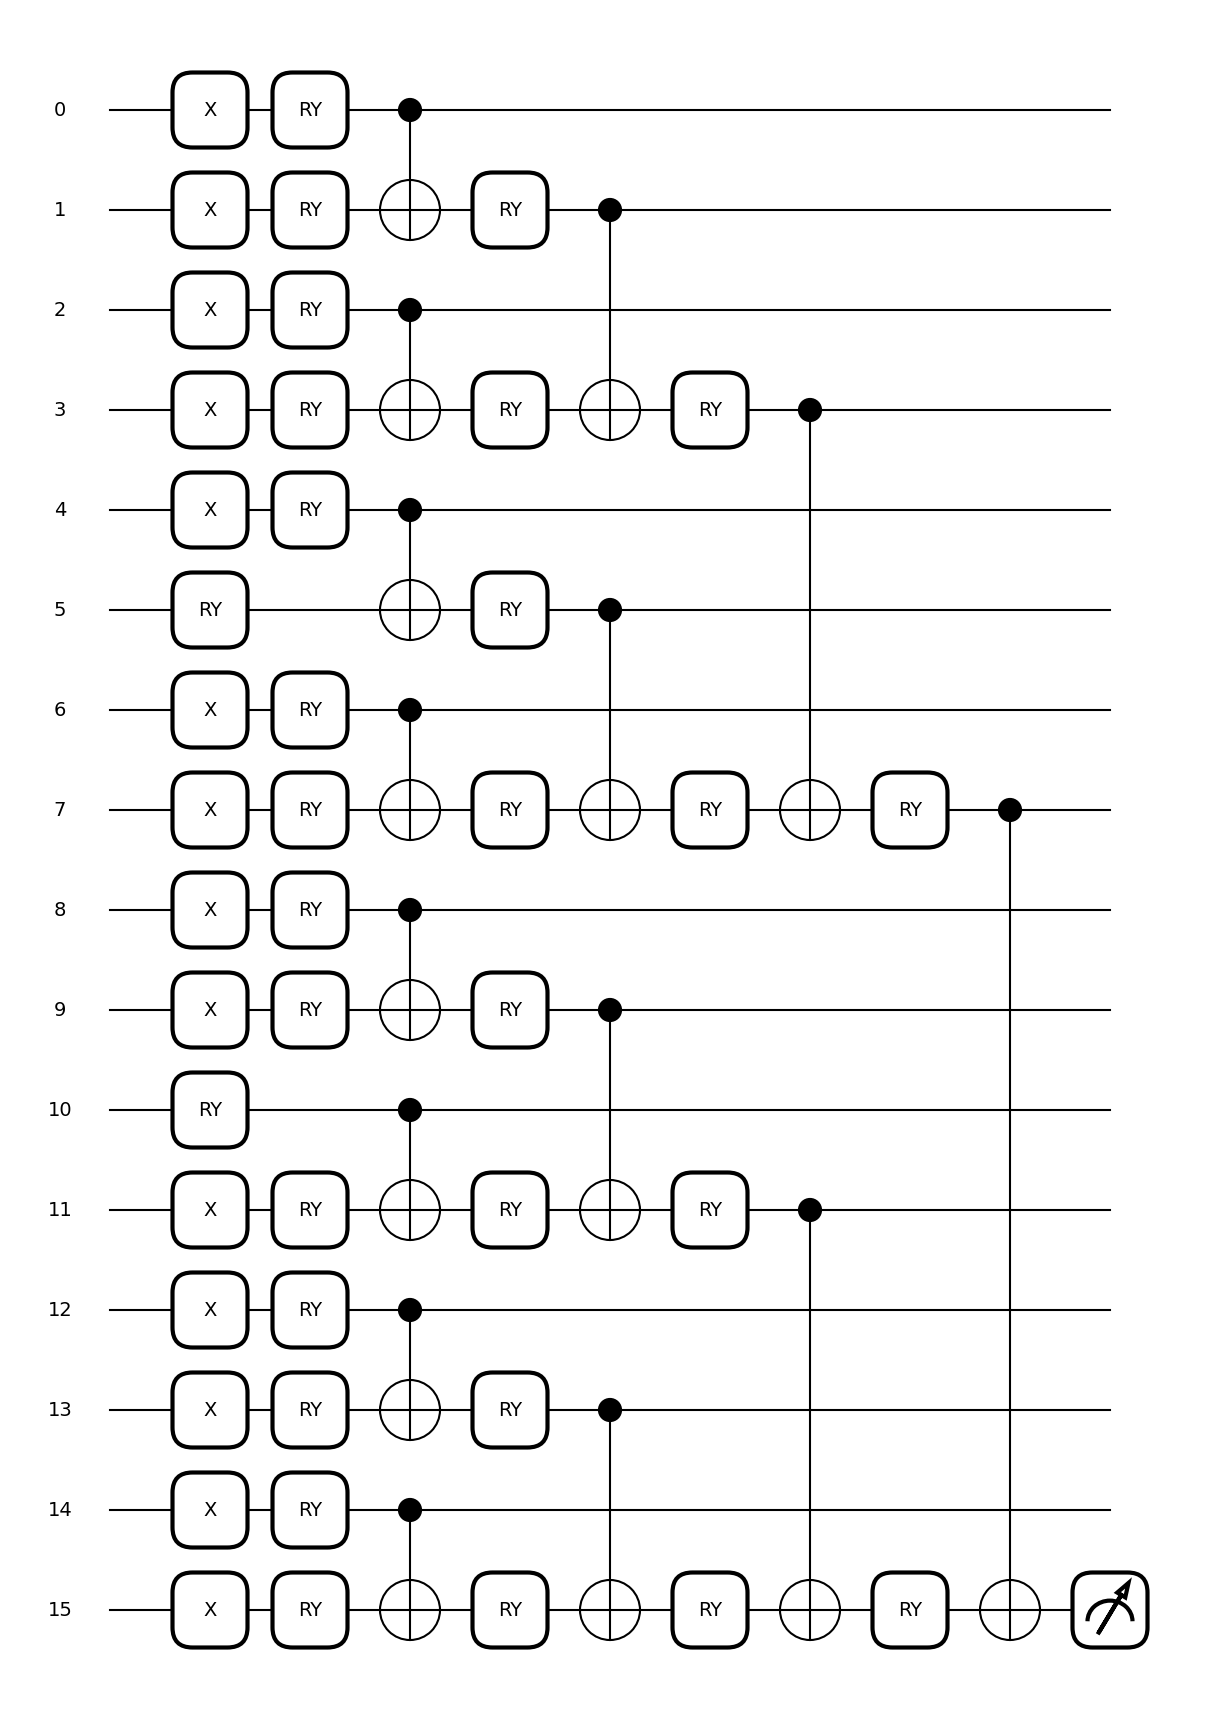

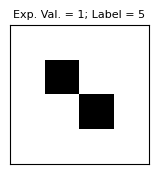

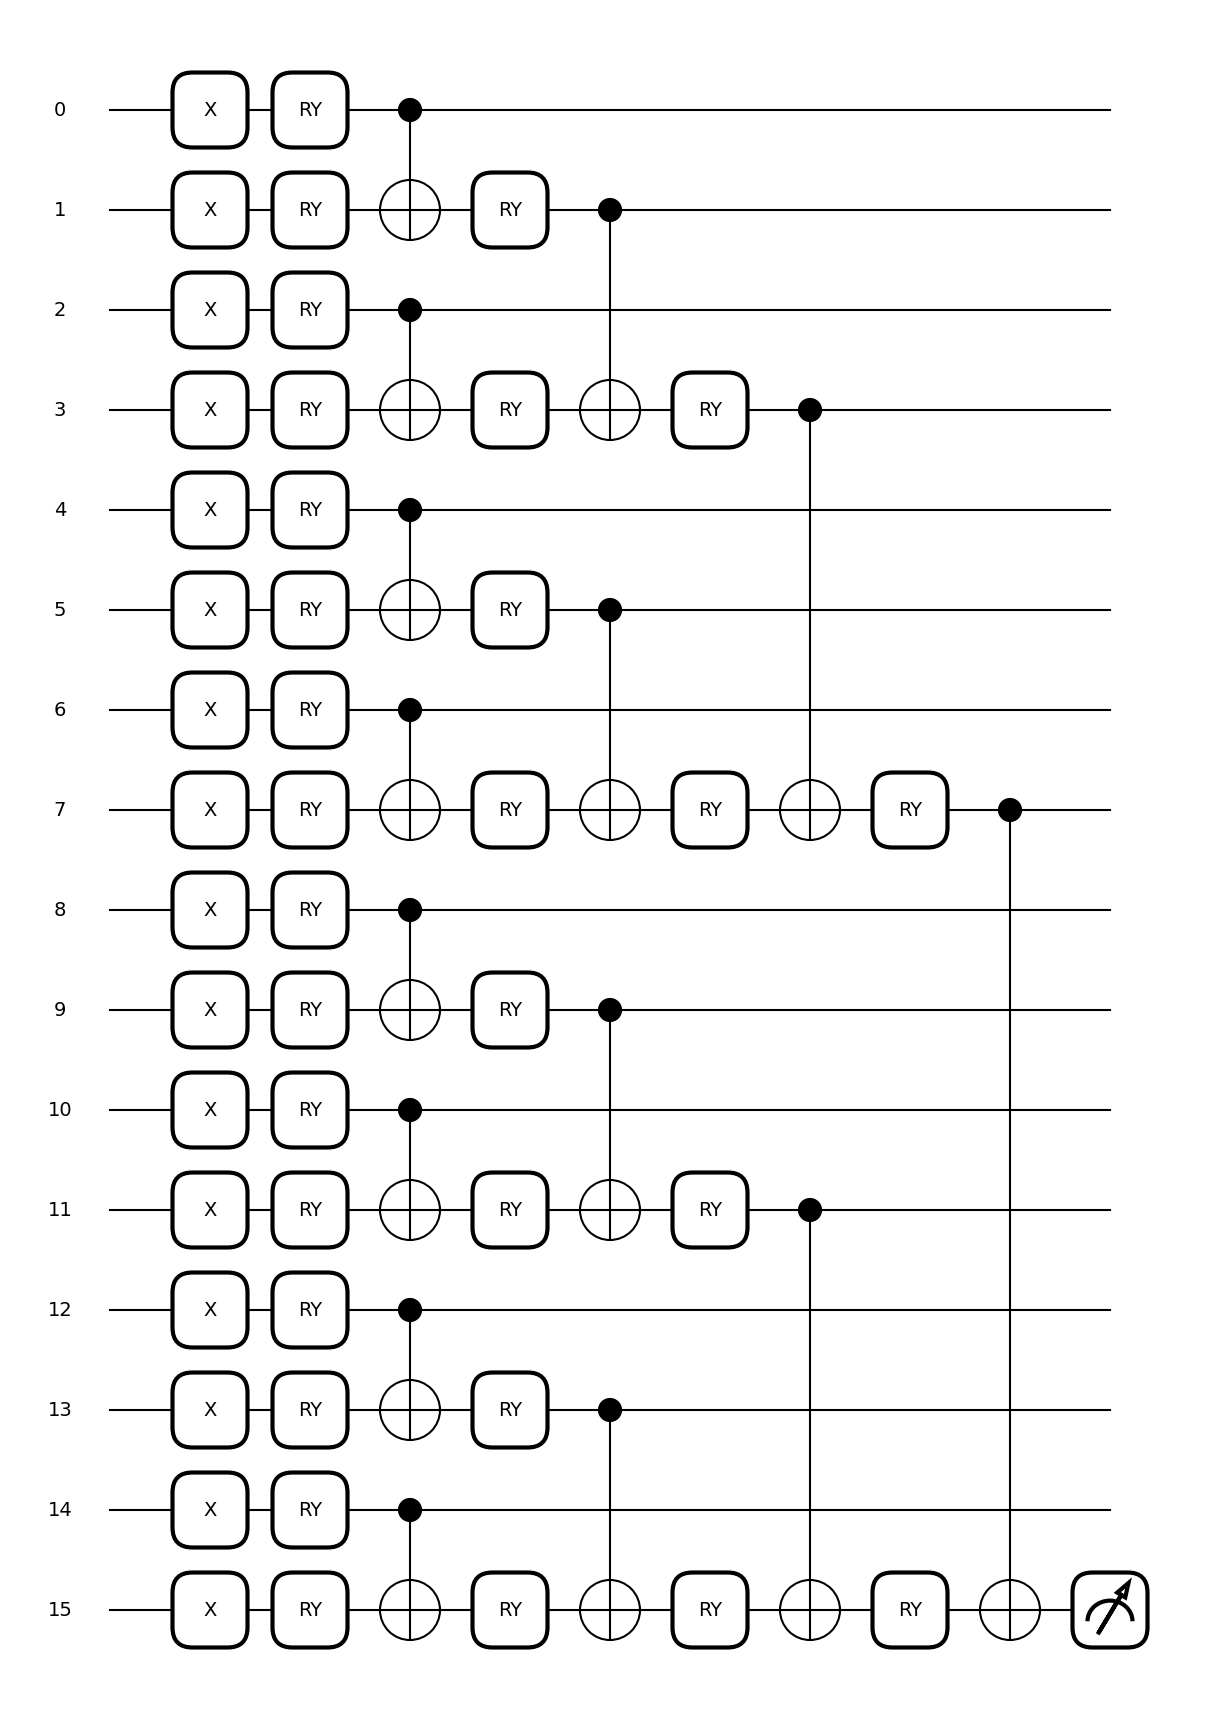

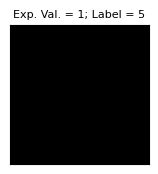

In [ ]:
for image in BAS[0: 10]:
    fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(image, params)
    plt.figure(figsize=[1.8, 1.8])
    plt.imshow(np.reshape(image, [4, 4]), cmap="gray")
    plt.title(
        f"Exp. Val. = {circuit(image,params):.0f};"
        + f" Label = {'5' if circuit(image,params)>0 else '3'}",
        fontsize=8,
    )
    plt.xticks([])
    plt.yticks([])

In [ ]:
BAS_test = []
for img in test_images:
  BAS_test.append(img.flatten())

In [ ]:
for img in BAS:
  print(f"Exp. Val. = {circuit(img,params):.0f};"
        + f" Label = {'3' if circuit(img,params)<0 else '5'}")

Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Ex

In [ ]:
for img in BAS_test:
  print(f"Exp. Val. = {circuit(img,params):.0f};"
        + f" Label = {'3' if circuit(img,params)<0 else '5'}")

Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5
Exp. Val. = 1; Label = 5
Exp. Val. = -1; Label = 3
Exp. Val. = -1; Label = 3
Exp. Val. = 1; Label = 5


In [ ]:
values, counts = np.unique(test_labels, return_counts=True)
values

array([3, 5])

In [ ]:
i = 0
train_correct = 0
for img in BAS:
  if circuit(img,params) < 0 and train_labels[i] == 3:
    train_correct += 1
  elif circuit(img,params) > 0 and train_labels[i] == 5:
    train_correct += 1
  i += 1
print("training accuracy: 60 images, 30 for letter 3 and 30 for letter 5")
print(100*train_correct/len(BAS),"%")

training accuracy: 60 images, 30 for letter 3 and 30 for letter 5
68.33333333333333 %


In [ ]:
values, counts = np.unique(test_labels, return_counts=True)
print(values)
print(counts)

[3 5]
[15 20]


In [ ]:
i = 0
test_correct = 0
for img in BAS_test:
  if circuit(img.flatten(),params) < 0 and test_labels[i] == 3:
    test_correct += 1
  elif circuit(img.flatten(),params) > 0 and test_labels[i] == 5:
    test_correct += 1
  i += 1
print("testing accuracy: 35 images, 15 for letter 3 and 20 for letter 5")
print(100*test_correct/len(BAS_test),"%")

testing accuracy: 35 images, 15 for letter 3 and 20 for letter 5
51.42857142857143 %


In [ ]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
data = data_load()
train_images, train_labels, test_images, test_labels = data.data_mnist()

6000


In [ ]:
train_images, train_labels, test_images, test_labels = trainTestData(train_images, train_labels, test_images, test_labels, 3, 5, 75, 35)

In [ ]:
new_train_images_3 = []
new_train_images_5 = []

new_train_labels_3 = []
new_train_labels_5 = []

for i in range(len(train_images)):
  if train_labels[i] == 3:
    new_train_images_3.append(train_images[i])
    new_train_labels_3.append(3)
  else:
    new_train_images_5.append(train_images[i])
    new_train_labels_5.append(5)
train_images = new_train_images_3[0:30] + new_train_images_5[0:30]
train_labels = new_train_labels_3[0:30] + new_train_labels_5[0:30]

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
def block(weights, wires):
    qml.RY(weights[0], wires=wires[0])
    qml.RY(weights[1], wires=wires[1])
    qml.CNOT(wires=wires)

In [ ]:
BAS = []
for img in train_images:
    img = rescale(img, 1/7, anti_aliasing=False)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] < 0.5:
                img[i][j] = 0
            else:
                img[i][j] = 1
    BAS.append(img.flatten())

In [ ]:
BAS[0].shape

(16,)

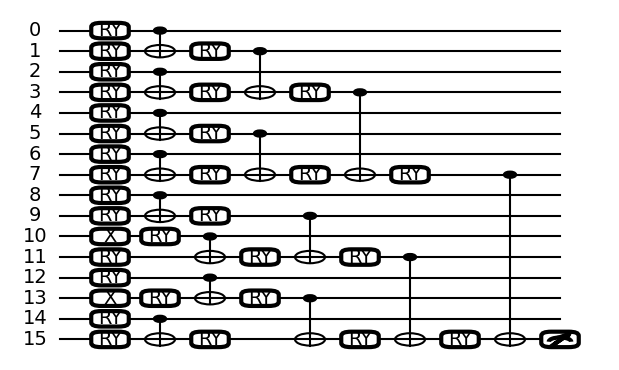

In [ ]:
dev = qml.device("default.qubit", wires=16)


@qml.qnode(dev)
def circuit(image, template_weights):
    qml.BasisStatePreparation(image, wires=range(16))
    qml.TTN(
        wires=range(16),
        n_block_wires=2,
        block=block,
        n_params_block=2,
        template_weights=template_weights,
    )
    return qml.expval(qml.PauliZ(wires=15))

weights = np.random.random(size=[15, 2])
fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(BAS[0], weights)
fig.set_size_inches((6, 3.5))

In [ ]:
BAS[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.])

In [ ]:
label1 = 3
label2 = 5
def costfunc(params):
    cost = 0
    for i in range(len(BAS)):
        if i < len(BAS) / 2:
            cost += circuit(BAS[i], params)
        else:
            cost -= circuit(BAS[i], params)
    return cost

In [ ]:
len(BAS)

60

In [ ]:
params = np.random.random(size=[15, 2], requires_grad=True)
optimizer = qml.GradientDescentOptimizer(stepsize=0.01)

for k in range(71):
    if k % 5 == 0:
        print(f"Step {k}, cost: {costfunc(params)}")
    params = optimizer.step(costfunc, params)

Step 0, cost: -2.4776837898846953
Step 5, cost: -4.646627252162201
Step 10, cost: -7.261861284426605
Step 15, cost: -9.597336550308349
Step 20, cost: -11.567942834012246
Step 25, cost: -14.040017787266974
Step 30, cost: -16.912470297386854
Step 35, cost: -18.646078250609015
Step 40, cost: -19.4269869075563
Step 45, cost: -19.794025729924968
Step 50, cost: -19.988011018449843
Step 55, cost: -20.109118307056985
Step 60, cost: -20.20033802316469
Step 65, cost: -20.280351554320063
Step 70, cost: -20.357449336687328


In [ ]:
i = 0
train_correct = 0
for img in BAS:
  if circuit(img,params) < 0 and train_labels[i] == 3:
    train_correct += 1
  elif circuit(img,params) > 0 and train_labels[i] == 5:
    train_correct += 1
  i += 1
print("training accuracy(2): 60 images, 30 for letter 3 and 30 for letter 5")
print(100*train_correct/len(BAS),"%")

training accuracy(2): 60 images, 30 for letter 3 and 30 for letter 5
66.66666666666667 %


In [ ]:
BAS_test = []
for img in test_images:
    img = rescale(img, 1/7, anti_aliasing=False)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] < 0.5:
                img[i][j] = 0
            else:
                img[i][j] = 1
    BAS_test.append(img.flatten())

In [ ]:
i = 0
test_correct = 0
for img in BAS_test:
  if circuit(img.flatten(),params) < 0 and test_labels[i] == 3:
    test_correct += 1
  elif circuit(img.flatten(),params) > 0 and test_labels[i] == 5:
    test_correct += 1
  i += 1
print("testing accuracy(2): 35 images, 15 for letter 3 and 20 for letter 5")
print(100*test_correct/len(BAS_test),"%")

testing accuracy(2): 35 images, 15 for letter 3 and 20 for letter 5
74.28571428571429 %


In [ ]:
values, counts = np.unique(test_labels, return_counts=True)
print(values)
print(counts)

[3 5]
[15 20]
